# CS:GO DATA ANALYSIS REPORT

* This data analysis report attempts to analyze several features across cs:go matches from 2014-02-23 until 2017-12-10 and at the end run a linear regression model to predict kills for the team that has earned the most money in prizes in the period.

* Reading in libraries.

In [635]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

In [636]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go

In [637]:
import cufflinks as cf

In [638]:
init_notebook_mode(connected=True)

In [639]:
cf.go_offline()

In [640]:
sns.set_style('darkgrid')

* Load datasets.

In [641]:
players_cs = pd.read_csv('players.csv')
teams_cs = pd.read_csv('teams.csv')
match_res_cs = pd.read_csv('matchResults.csv', parse_dates=['Date'], index_col='Date')
winner_cs = pd.read_csv('eventWinner.csv')
player_stats_df = pd.read_csv('playerStats.csv')

# How often are matches and tournaments being held ?

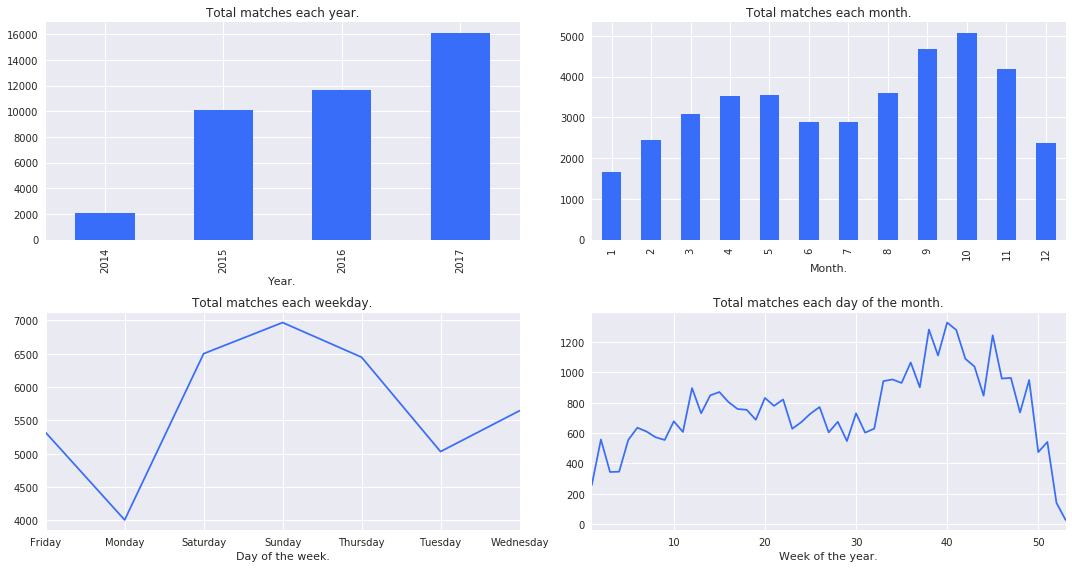

In [642]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

sns.set_palette('rainbow')


year = match_res_cs.groupby(match_res_cs.index.year).size()
month = match_res_cs.groupby(match_res_cs.index.month).size()
week_day = match_res_cs.groupby(match_res_cs.index.weekday_name).size()
day = match_res_cs.groupby(match_res_cs.index.weekofyear).size()

year.plot(ax= axs[0,0],kind='bar'); axs[0,0].set_title('Total matches each year.'); axs[0,0].set_xlabel('Year.')
month.plot(ax = axs[0,1], kind='bar'); axs[0,1].set_title('Total matches each month.'); axs[0,1].set_xlabel('Month.')
week_day.plot(ax= axs[1,0]); axs[1,0].set_title('Total matches each weekday.'); axs[1,0].set_xlabel('Day of the week.')
day.plot(ax = axs[1,1]); axs[1,1].set_title('Total matches each day of the month.'); axs[1,1].set_xlabel('Week of the year.')


plt.tight_layout()
plt.show()

# Where do players come from?

In [643]:
top10 = players_cs.groupby('Country').size().sort_values(ascending=False)[:10]

top10 = pd.DataFrame(top10).rename(columns={0:'Total Players'})

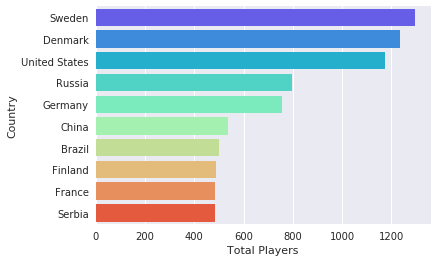

In [644]:
sns.barplot(x='Total Players',y=top10.index,data=top10, palette='rainbow')
plt.show()

# Top 10 most First names in CS:GO.

In [645]:
first_names_df = pd.DataFrame(players_cs.groupby('First Name').size().sort_values(ascending=False)[1:11]).rename(columns={0:'Count'})

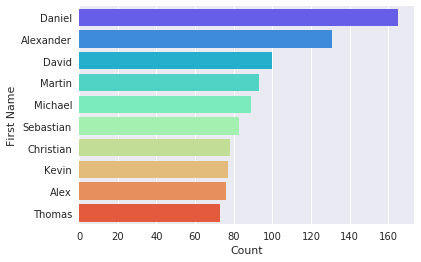

In [646]:
sns.barplot(x='Count',y=first_names_df.index,data=first_names_df,palette='rainbow')
plt.show()

# Top 10 players with most kills.

In [647]:
labeled_players = pd.merge(player_stats_df, players_cs, left_on='Player', right_on='ID',how='left')

most_kills = labeled_players.groupby('Name')['Kills'].sum().sort_values(ascending=False)

most_kills_df = pd.DataFrame(most_kills)[:10]

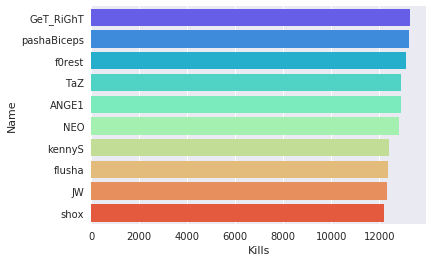

In [648]:
sns.barplot(x='Kills', y=most_kills_df.index, data=most_kills_df, palette='rainbow')
plt.show()

# Top 20 players with least kills.

In [649]:
least_kills = labeled_players.groupby('Name')['Kills'].sum().sort_values()

least_kills_df = pd.DataFrame(least_kills)[:20].sort_values(by='Kills',ascending=False)

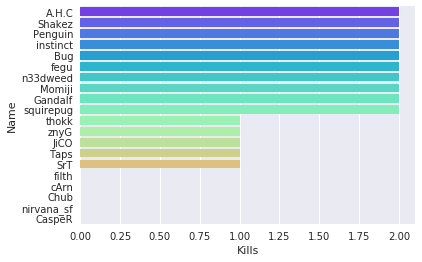

In [650]:
sns.barplot(x='Kills',y=least_kills_df.index,data=least_kills_df, palette='rainbow')
plt.show()

# Top 10 Players with most deaths.

In [651]:
most_deaths = labeled_players.groupby('Name')['Deaths'].sum().sort_values(ascending=False)

In [652]:
most_deaths_df = pd.DataFrame(most_deaths)[:10]

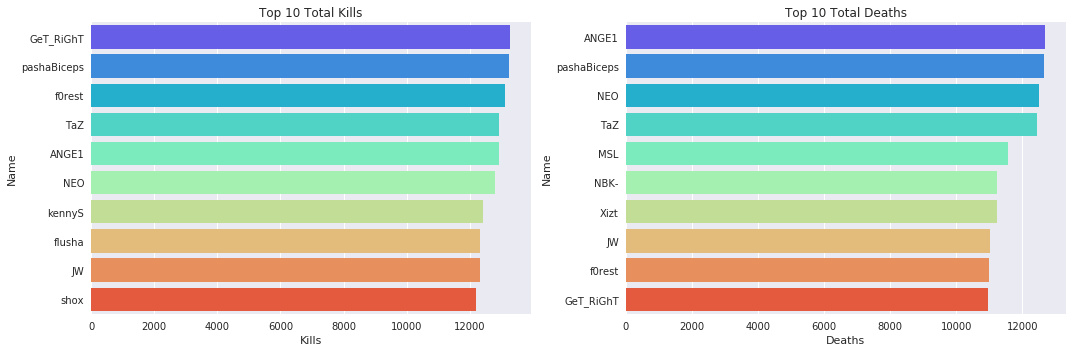

In [653]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].set_title('Top 10 Total Kills')
sns.barplot(x='Kills', y=most_kills_df.index, data=most_kills_df, palette='rainbow',ax=axs[0])

axs[1].set_title('Top 10 Total Deaths')
sns.barplot(x='Deaths', y=most_deaths_df.index, data=most_deaths_df, palette='rainbow',ax=axs[1])

plt.tight_layout()
plt.show()

# Best Rating.

In [654]:
best_rating = labeled_players.groupby('Name')['Rating'].sum()/labeled_players.groupby('Name')['Rating'].size()

best_rating = best_rating.sort_values(ascending=False)

best_rating_df = pd.DataFrame(best_rating)[:10]

* Could be misleading because we do not know how many games they played.

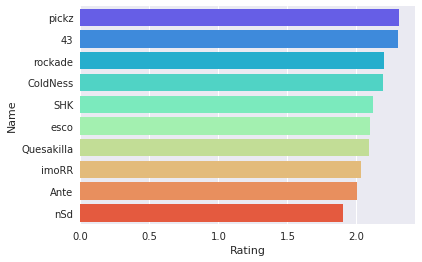

In [655]:
sns.barplot(x='Rating',y=best_rating_df.index, data=best_rating_df, palette='rainbow')
plt.show()

# Players with the most matches.

In [656]:
more_than_500 = labeled_players.groupby('Name')['MatchID'].size().sort_values(ascending=False)

more_than_500_df = pd.DataFrame(more_than_500).rename(columns={'MatchID':'Matches'})[:10]

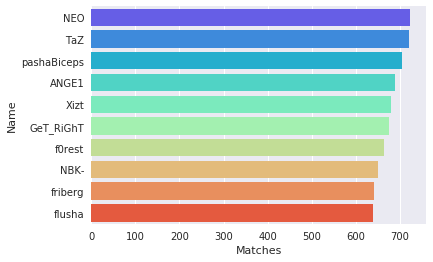

In [657]:
sns.barplot(x='Matches', y=more_than_500_df.index, data=more_than_500_df, palette='rainbow')
plt.show()

# Best rated players with the most matches.

In [658]:
best_rated_500_df = pd.merge(more_than_500_df, labeled_players, left_index=True, right_on='Name')

best_rated_500 = best_rated_500_df.groupby('Name')['Rating'].sum()/best_rated_500_df.groupby('Name')['Rating'].size()

best_of_the_best = pd.DataFrame(best_rated_500).sort_values(by='Rating',ascending=False)

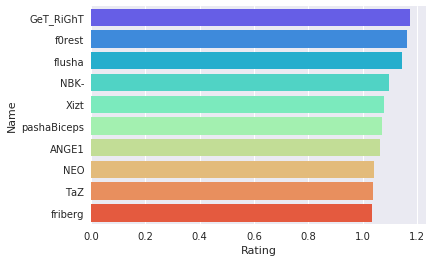

In [659]:
sns.barplot(x='Rating',y=best_of_the_best.index,data=best_of_the_best, palette='rainbow')
plt.show()

* It seems like GeT_RiGhT is the best player in the world. Interestingly, he is from..................

In [660]:
labeled_players.loc[labeled_players.Name == 'GeT_RiGhT'][:1]

Map    Team Player  Kills  Deaths   ADR  KAST%  Rating  Rating Type  \
1194  Mirage  4411.0     39    8.0    17.0  52.6   47.6    0.64          2.0   

        MatchID    ID       Name Country   First Name Last Name  
1194  2301841.0  39.0  GeT_RiGhT  Sweden  Christopher   Alesund

# SWEDEN!

# Which maps did countries kill the most opponents?

In [661]:
country_kills = pd.DataFrame(labeled_players.groupby(['Country','Map'])['Kills'].sum().sort_values(ascending=False)[:10])

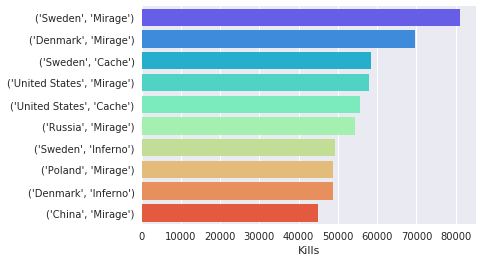

In [662]:
sns.barplot(x='Kills',y=country_kills.index, data=country_kills,palette='rainbow')
plt.show()

# Top 10 Teams with most wins.

In [663]:
def win_los(row):
    res = row['Team 1 Score'] - row['Team 2 Score']
    if res > 0:
        return row['Team 1 ID']
    elif res == 0:
        return 'TIE'
    else:
        return row['Team 2 ID']

In [664]:
match_res_cs['Winner'] = match_res_cs.apply(win_los, axis=1)

best_teams = match_res_cs.groupby('Winner').size().sort_values(ascending=False)

best_teams_df = pd.DataFrame(best_teams)[:10].rename(columns={0:'Wins'})#.reset_index()

best_teams_labeled = pd.merge(best_teams_df, teams_cs, left_index=True, right_on='ID')

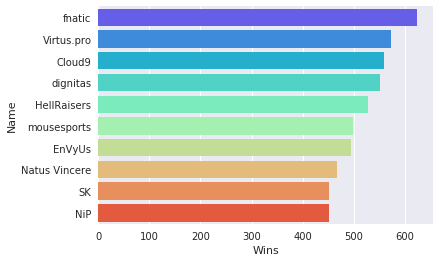

In [665]:
sns.barplot(x='Wins', y='Name', data=best_teams_labeled, palette='rainbow')
plt.show()

# Where is the best team from?........................

In [666]:
best_teams_labeled[:1]

Wins    Name Country    ID
7497   625  fnatic  Sweden  4991

# SWEDEN!!!!!!

# Choropleth Kills/Country.

In [667]:
import psycopg2
conn = psycopg2.connect('postgresql://brosra01@localhost/world')
ctrydf = pd.read_sql_query('select * from country', con = conn)

In [668]:
codes = pd.merge(country_kills_df, ctrydf, left_on='Country', right_on='name')

In [669]:
country_kills_df = pd.DataFrame(labeled_players.groupby('Country')['Kills'].sum().sort_values(ascending=False).reset_index())

country_kills_df.head()

data = dict(type = 'choropleth',
           locationmode = 'country names',
            colorscale = 'YIOrRd',
           locations = codes.Country,
           z = codes.Kills,
           colorbar = {'title' : 'Kills'},
           hoverinfo='location+z+text',
           hoverlabel = {'bgcolor': 'blue', 'bordercolor':'white'},
           marker = dict(line = dict(color='black', width=1)), opacity = .1)

layout = dict(title = 'Kills by Country',geo=dict(projection = {'type':'orthographic'}, showframe=False, showocean=True, oceancolor='rgb(64, 150, 223)'))

choromap = go.Figure(data = [data],layout=layout)

iplot(choromap)

# Let's analyze how much the top10 first place winning teams have finished in first place and profited from CS:GO.

* Load specific data sets.

In [670]:
event_winners = pd.read_csv('eventWinner.csv')
prizes_df = pd.read_csv('eventPrizes.csv')
event_IDS = pd.read_csv('eventPrizes.csv')

In [671]:
top_winners = pd.DataFrame(event_winners.groupby('1').size().sort_values(ascending=False)).reset_index().rename(columns={'1':'Team ID',0:'Wins'})[:10]

top_winners['Team ID'] = top_winners['Team ID'].apply(lambda x : int(x))

winner_cs = winner_cs.rename(columns={'1':'First','2':'Second','3':'Third'})

winner_labeled = pd.merge(event_IDS, winner_cs, left_on='Event ID', right_on='Event ID').fillna(0)

top_winners_labeled = pd.merge(top_winners, teams_cs, left_on='Team ID',right_on='ID')

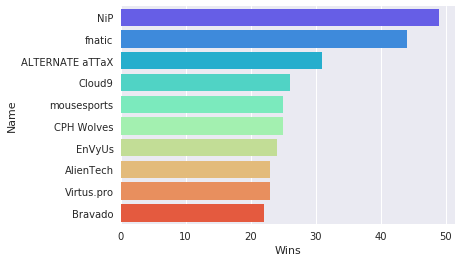

In [672]:
sns.barplot(x='Wins',y='Name', data=top_winners_labeled, palette='rainbow')
plt.show()

# Top 10 most profitable teams that, only counting prizes for finishing in first place.

In [673]:
def convert_to_int_sum(num):
    num = str(num).split(',')
    num = ''.join(num)
    return int(num)

In [674]:
winner_labeled['1'] = winner_labeled['1'].apply(convert_to_int_sum)

winner_labeled_df = pd.DataFrame(winner_labeled.groupby('First')['1'].sum().sort_values(ascending=False).reset_index()).rename(columns={'1':'Prize'})[:10]

winner_prize_labeled_df = pd.merge(winner_labeled_df, teams_cs, left_on='First', right_on='ID')

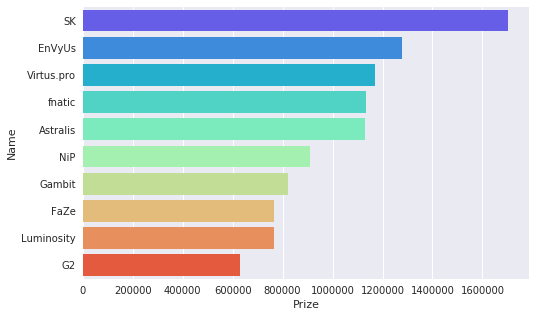

In [675]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='Prize', y='Name', data=winner_prize_labeled_df, palette='rainbow')
plt.show()

# Where is the team that has earned the most money in prizes from?..............

In [676]:
teams_cs[teams_cs.Name == 'SK']

Name Country    ID
3306   SK  Brazil  6137
6532   SK  Sweden  5152

# ........................ Brazil or Sweden????????

In [677]:
winner_prize_labeled_df.loc[winner_prize_labeled_df.Name == 'SK']

First    Prize Name Country    ID
0  6137  1702288   SK  Brazil  6137

# BRASIIIIIIIIIIIIIIIL !!

# Let's take a look at SK from Brasil.

In [678]:
country_gb = labeled_players.groupby('Country')

brazil_gb = country_gb.get_group('Brazil')

brazil_teams_df = pd.merge(brazil_gb, teams_cs, left_on='Team', right_on='ID')

brazil_sk = brazil_teams_df.groupby('Name_y').get_group('SK')

brazil_sk_df = pd.DataFrame(brazil_sk)

brazil_sk_corr = brazil_sk.loc[:, 'Kills':'Rating']

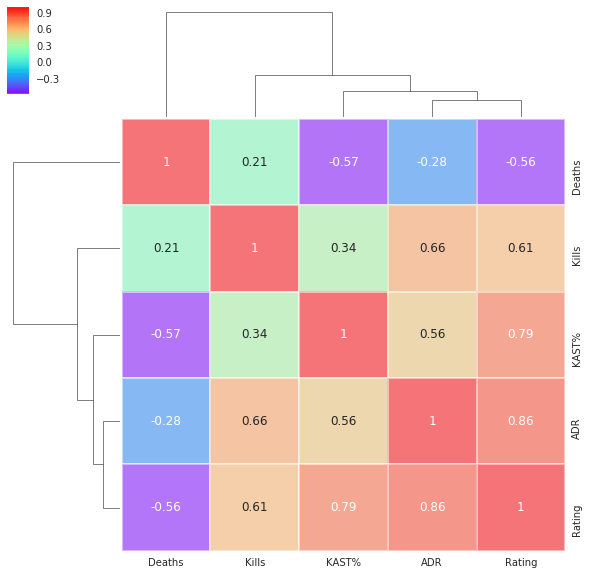

In [679]:
sns.set_context(context='notebook')
ax = sns.clustermap(brazil_sk_corr.corr(), linecolor='white',linewidths=1, annot=True, cmap='rainbow', alpha=.5)

plt.show()

# SK Brasil correlations and distributions.

/usr/local/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label', 'color'



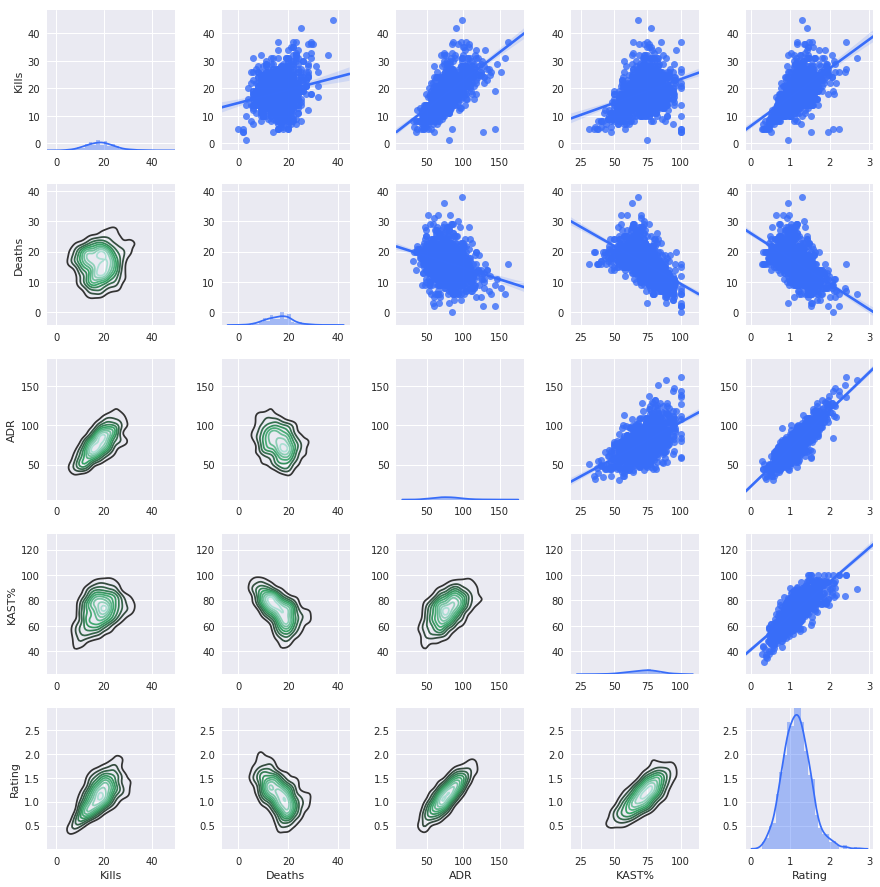

In [680]:
g = sns.PairGrid(brazil_sk_corr.dropna())
g.map_diag(sns.distplot)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)

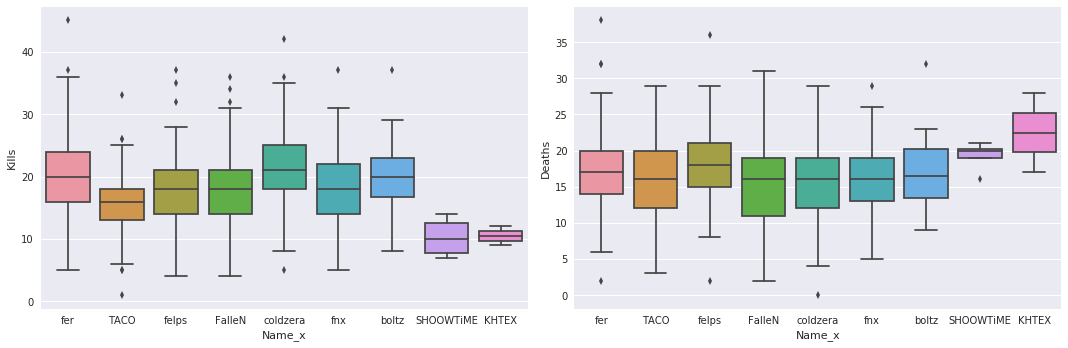

In [681]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Name_x', y='Kills', data=brazil_sk_df, ax=ax[0])
sns.boxplot(x='Name_x', y='Deaths', data=brazil_sk_df, ax=ax[1])
plt.tight_layout()

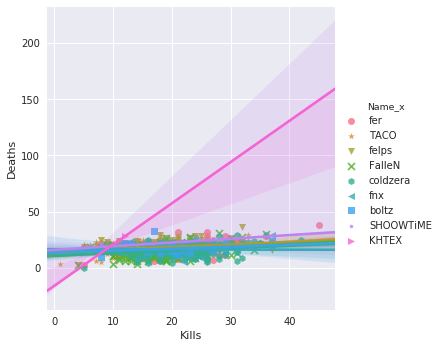

In [682]:
sns.lmplot(x='Kills', y='Deaths', hue='Name_x', data=brazil_sk_df, markers=['o','*','v','x','h','<',',','.','>'])
plt.show()

* Looks like things are not going so well for KHTEX..

#  Overall SK rating for all the matches they have played in as a team. Not taking into account which players were playing.

In [683]:
brazil_sk_df.Rating.sum()/len(brazil_sk_df)

1.163082549634274

# Total kills per player on SK Brasil.

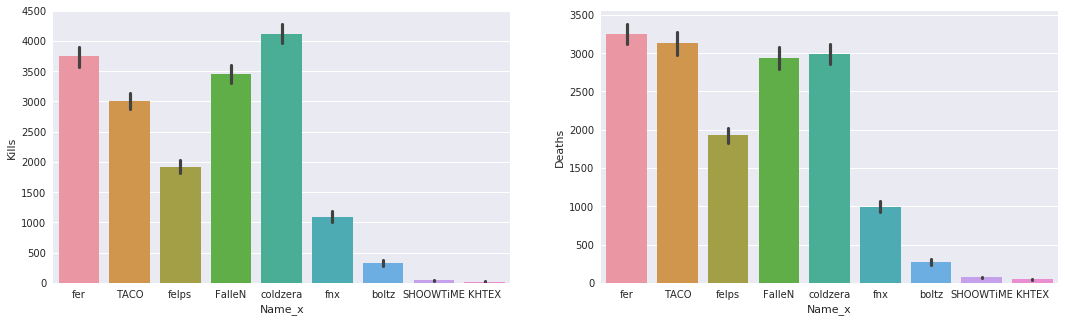

In [684]:
fig, (ax1, axs2)= plt.subplots(1,2,figsize=(18,5))

sns.barplot(x='Name_x',y='Kills',data=brazil_sk_df,estimator=np.sum, ax = ax1)
sns.barplot(x='Name_x',y='Deaths',data=brazil_sk_df,estimator=np.sum, ax =axs2)

plt.show()

* I wonder when did the last four players on the right joined SK.
* Good Job coldzera!

# Predicting Kills for SK Brasil.

* Check correlations for SK Brasil.

In [790]:
brazil_sk_corr.corr()

Kills    Deaths       ADR     KAST%    Rating
Kills   1.000000  0.206621  0.658864  0.340368  0.607620
Deaths  0.206621  1.000000 -0.283531 -0.566076 -0.557127
ADR     0.658864 -0.283531  1.000000  0.557080  0.864975
KAST%   0.340368 -0.566076  0.557080  1.000000  0.786079
Rating  0.607620 -0.557127  0.864975  0.786079  1.000000

* Import statistical sklearn library.

In [791]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [792]:
brazil_sk_df.columns

Index(['Map', 'Team', 'Player', 'Kills', 'Deaths', 'ADR', 'KAST%', 'Rating',
       'Rating Type', 'MatchID', 'ID_x', 'Name_x', 'Country_x', 'First Name',
       'Last Name', 'Name_y', 'Country_y', 'ID_y'],
      dtype='object')

* Split into training set and test set.

In [793]:
X, y = brazil_sk_df[['Deaths', 'ADR', 'KAST%', 'Rating']], brazil_sk_df['Kills']

In [794]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

* Instantiate linear regression estimator.

In [795]:
lm = LinearRegression()

* Fit the model with the training set.

In [796]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [797]:
lm.coef_

array([  0.9224678 ,  -0.05613385,  -0.07222568,  22.95165485])

* Predict off test set.

In [798]:
preds = lm.predict(X_test)

* Check model coefficient scores. Relatively good.

In [799]:
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,preds)))
print('R^2:', metrics.r2_score(y_test, preds))

MAE: 1.93967355864
MSE: 7.08597073103
RMSE: 1.39272163717
R^2: 0.821285112692


* Fit regression line on 

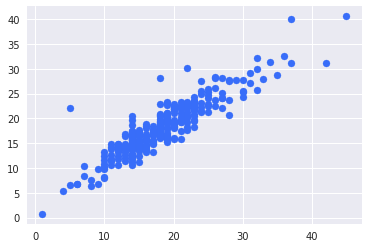

In [800]:
plt.scatter(x=y_test, y= preds)

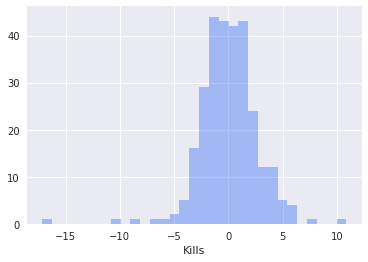

In [801]:
sns.distplot(y_test-preds, kde=False)

In [802]:
coeffs = pd.DataFrame(columns=['Coefficients'], index=['Deaths', 'ADR', 'KAST%', 'Rating'], data=lm.coef_)

In [803]:
coeffs

Coefficients
Deaths      0.922468
ADR        -0.056134
KAST%      -0.072226
Rating     22.951655

In [804]:
print('The r^2 for this model is: {}'.format(lm.score(X_test,y_test)))

The r^2 for this model is: 0.8212851126923567
